In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [67]:
# Reading the data
df = pd.read_csv('data.csv') 

In [68]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,ZWE,Africa,Zimbabwe,2022-08-01,256382.0,4.0,16.000,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206611,ZWE,Africa,Zimbabwe,2022-08-02,256403.0,21.0,17.000,5578.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206612,ZWE,Africa,Zimbabwe,2022-08-03,256423.0,20.0,15.429,5579.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206613,ZWE,Africa,Zimbabwe,2022-08-04,256444.0,21.0,15.429,5581.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [69]:
df.head() # .head shows first five columns

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [70]:
# Finding total number of rows and columns present in the data set.
df.shape

(206615, 67)

In [71]:
#  It will show the basic summary of data such as count, min, max, unique values, etc.
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.982420e+05,1.980160e+05,1.968390e+05,1.794720e+05,179452.000000,178285.000000,197331.000000,197105.000000,195933.000000,178574.000000,...,128538.000000,126777.000000,83462.000000,151000.000000,193280.000000,165509.000000,7.021000e+03,7021.000000,7039.000000,7021.000000
mean,3.809792e+06,1.256824e+04,1.256849e+04,6.898863e+04,148.333014,149.042433,49937.364601,188.905706,188.856917,637.101052,...,10.659800,32.800693,50.877033,3.084975,73.644921,0.725005,4.443878e+04,9.622816,14.726295,1219.057534
std,2.391617e+07,8.725688e+04,8.519723e+04,3.575048e+05,761.530679,745.047351,91169.974224,917.615126,599.536544,925.149254,...,10.604734,13.532628,31.847341,2.551079,7.449049,0.149708,1.238340e+05,13.771885,27.081946,1628.300494
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1694.146120
25%,3.386000e+03,0.000000e+00,6.714000e+00,1.030000e+02,0.000000,0.143000,907.747500,0.000000,1.487000,26.275000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.210000e+01,0.180000,-0.295000,7.007893
50%,4.140450e+04,6.500000e+01,1.004290e+02,1.028000e+03,1.000000,1.714000,8126.872000,9.248000,19.928000,184.150500,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.114900e+03,7.070000,7.250000,679.856555
75%,4.448200e+05,1.013000e+03,1.149358e+03,9.082000e+03,16.000000,17.286000,61325.593500,102.510000,135.565000,945.830000,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.146100e+04,15.100000,20.640000,1915.226561
max,5.829280e+08,4.079467e+06,3.437955e+06,6.415652e+06,18191.000000,14817.143000,655309.333000,195005.313000,35258.843000,6363.429000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.219078e+06,76.550000,375.980000,9726.079559


In [72]:
# Dropping the column
# df.drop('column_name', axis=1,inplace=True)
df.drop('new_cases_smoothed', axis=1,inplace=True)

In [73]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,0.125,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [74]:
df.shape

(206615, 66)

In [75]:
#For multiple deletion of column
df.drop(['new_deaths_smoothed','new_cases_per_million','total_cases_per_million'],axis=1,inplace=True)

In [76]:
df.shape

(206615, 63)

In [77]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [78]:
# We can rename column name, row name, or index
df.rename(columns={'date': 'Date', 'location': 'Country', 'continent': 'Continent', 'iso_code': 'ISO_Code'}, inplace= True)

In [79]:
df

,ISO_Code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,ZWE,Africa,Zimbabwe,2022-08-01,256382.0,4.0,5577.0,0.0,1.000,348.704,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206611,ZWE,Africa,Zimbabwe,2022-08-02,256403.0,21.0,5578.0,1.0,1.063,348.766,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206612,ZWE,Africa,Zimbabwe,2022-08-03,256423.0,20.0,5579.0,1.0,0.965,348.829,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206613,ZWE,Africa,Zimbabwe,2022-08-04,256444.0,21.0,5581.0,2.0,0.965,348.954,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [80]:
# Listing the continent name in the list:
continent_unique = list(df.Continent.unique())

In [81]:
continent_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [82]:
# Using Simple Imputer
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [83]:
df2

,ISO_Code,Continent,Country,Date,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,ZWE,Africa,Zimbabwe,2022-08-01,256382.0,4.0,5577.0,0.0,1.0,348.704,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
206611,ZWE,Africa,Zimbabwe,2022-08-02,256403.0,21.0,5578.0,1.0,1.063,348.766,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
206612,ZWE,Africa,Zimbabwe,2022-08-03,256423.0,20.0,5579.0,1.0,0.965,348.829,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
206613,ZWE,Africa,Zimbabwe,2022-08-04,256444.0,21.0,5581.0,2.0,0.965,348.954,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value


In [84]:
# Forming Subset Of Data using groupby()
df3 = df2.groupby(['Date','Country','total_cases','total_deaths','total_vaccinations']).sum().reset_index()

In [85]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_Code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,2022-08-05,Wallis and Futuna,761.0,7.0,missing_value,WLF,Oceania,0.0,0.0,0.0,...,missing_value,missing_value,missing_value,missing_value,79.94,missing_value,missing_value,missing_value,missing_value,missing_value
206611,2022-08-05,World,582928015.0,6415652.0,12394410360.0,OWID_WRL,missing_value,912410.0,2849.0,120.585,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
206612,2022-08-05,Yemen,11895.0,2152.0,missing_value,YEM,Asia,0.0,0.0,0.199,...,7.6,29.2,49.542,0.7,66.12,0.47,missing_value,missing_value,missing_value,missing_value
206613,2022-08-05,Zambia,331074.0,4015.0,missing_value,ZMB,Africa,499.0,0.0,11.672,...,3.1,24.7,13.938,2.0,63.89,0.584,missing_value,missing_value,missing_value,missing_value


In [86]:
df3 = df2.groupby(['Date', 'Country', 'total_cases', 'total_deaths', 'total_vaccinations']).sum().reset_index()

In [87]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_Code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,2022-08-05,Wallis and Futuna,761.0,7.0,missing_value,WLF,Oceania,0.0,0.0,0.0,...,missing_value,missing_value,missing_value,missing_value,79.94,missing_value,missing_value,missing_value,missing_value,missing_value
206611,2022-08-05,World,582928015.0,6415652.0,12394410360.0,OWID_WRL,missing_value,912410.0,2849.0,120.585,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
206612,2022-08-05,Yemen,11895.0,2152.0,missing_value,YEM,Asia,0.0,0.0,0.199,...,7.6,29.2,49.542,0.7,66.12,0.47,missing_value,missing_value,missing_value,missing_value
206613,2022-08-05,Zambia,331074.0,4015.0,missing_value,ZMB,Africa,499.0,0.0,11.672,...,3.1,24.7,13.938,2.0,63.89,0.584,missing_value,missing_value,missing_value,missing_value


In [88]:
# Replacing Missing values with 0
df3['total_cases'].replace({'missing_value': 0}, inplace=True)

In [89]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_Code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,0.0,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,0.0,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,0.0,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,0.0,missing_value,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,0.0,missing_value,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,2022-08-05,Wallis and Futuna,761.0,7.0,missing_value,WLF,Oceania,0.0,0.0,0.0,...,missing_value,missing_value,missing_value,missing_value,79.94,missing_value,missing_value,missing_value,missing_value,missing_value
206611,2022-08-05,World,582928015.0,6415652.0,12394410360.0,OWID_WRL,missing_value,912410.0,2849.0,120.585,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
206612,2022-08-05,Yemen,11895.0,2152.0,missing_value,YEM,Asia,0.0,0.0,0.199,...,7.6,29.2,49.542,0.7,66.12,0.47,missing_value,missing_value,missing_value,missing_value
206613,2022-08-05,Zambia,331074.0,4015.0,missing_value,ZMB,Africa,499.0,0.0,11.672,...,3.1,24.7,13.938,2.0,63.89,0.584,missing_value,missing_value,missing_value,missing_value


In [90]:
df3['total_deaths'].replace({'missing_value': 0}, inplace=True)

In [91]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_Code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,0.0,0.0,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,0.0,0.0,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,0.0,0.0,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,0.0,0.0,missing_value,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,0.0,0.0,missing_value,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,2022-08-05,Wallis and Futuna,761.0,7.0,missing_value,WLF,Oceania,0.0,0.0,0.0,...,missing_value,missing_value,missing_value,missing_value,79.94,missing_value,missing_value,missing_value,missing_value,missing_value
206611,2022-08-05,World,582928015.0,6415652.0,12394410360.0,OWID_WRL,missing_value,912410.0,2849.0,120.585,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
206612,2022-08-05,Yemen,11895.0,2152.0,missing_value,YEM,Asia,0.0,0.0,0.199,...,7.6,29.2,49.542,0.7,66.12,0.47,missing_value,missing_value,missing_value,missing_value
206613,2022-08-05,Zambia,331074.0,4015.0,missing_value,ZMB,Africa,499.0,0.0,11.672,...,3.1,24.7,13.938,2.0,63.89,0.584,missing_value,missing_value,missing_value,missing_value


In [92]:
df3['total_vaccinations'].replace({'missing_value': 0}, inplace=True)

In [93]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_Code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00,MEX,North America,missing_value,missing_value,missing_value,...,6.9,21.4,87.847,1.38,75.05,0.779,missing_value,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,0.0,0.0,0.000000e+00,ARG,South America,missing_value,missing_value,missing_value,...,16.2,27.7,missing_value,5.0,76.67,0.845,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,2022-08-05,Wallis and Futuna,761.0,7.0,0.000000e+00,WLF,Oceania,0.0,0.0,0.0,...,missing_value,missing_value,missing_value,missing_value,79.94,missing_value,missing_value,missing_value,missing_value,missing_value
206611,2022-08-05,World,582928015.0,6415652.0,1.239441e+10,OWID_WRL,missing_value,912410.0,2849.0,120.585,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
206612,2022-08-05,Yemen,11895.0,2152.0,0.000000e+00,YEM,Asia,0.0,0.0,0.199,...,7.6,29.2,49.542,0.7,66.12,0.47,missing_value,missing_value,missing_value,missing_value
206613,2022-08-05,Zambia,331074.0,4015.0,0.000000e+00,ZMB,Africa,499.0,0.0,11.672,...,3.1,24.7,13.938,2.0,63.89,0.584,missing_value,missing_value,missing_value,missing_value


In [94]:
# Will plot subset of specific data:
# We will find total countries where total_deaths is greater than 1000000.
df4 = df3[df3['total_deaths']>1000000]

In [95]:
df4

,Date,Country,total_cases,total_deaths,total_vaccinations,ISO_Code,Continent,new_cases,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
45038,2020-09-19,World,30863810.0,1004910.0,0.000000e+00,OWID_WRL,missing_value,293242.0,5271.0,36.776,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
45262,2020-09-20,World,31118944.0,1008875.0,0.000000e+00,OWID_WRL,missing_value,255134.0,3965.0,36.89,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
45486,2020-09-21,World,31378636.0,1013282.0,0.000000e+00,OWID_WRL,missing_value,259692.0,4407.0,36.762,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
45710,2020-09-22,World,31662918.0,1019433.0,0.000000e+00,OWID_WRL,missing_value,284282.0,6151.0,36.834,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
45934,2020-09-23,World,31974461.0,1025959.0,0.000000e+00,OWID_WRL,missing_value,311543.0,6526.0,36.954,...,6.434,34.635,60.13,2.705,72.58,0.737,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206538,2022-08-05,North America,109286582.0,1481329.0,1.039126e+09,OWID_NAM,missing_value,155493.0,816.0,233.083,...,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value
206577,2022-08-05,South America,62480221.0,1317510.0,9.111536e+08,OWID_SAM,missing_value,60863.0,408.0,146.506,...,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value
206602,2022-08-05,United States,92090455.0,1033516.0,0.000000e+00,USA,North America,128936.0,696.0,328.706,...,19.1,24.6,missing_value,2.77,78.86,0.926,missing_value,missing_value,missing_value,missing_value
206603,2022-08-05,Upper middle income,137377372.0,2552234.0,5.280856e+09,OWID_UMC,missing_value,103179.0,547.0,48.9,...,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value,missing_value


In [96]:
countries = df4['Country'].unique()
len(countries) # There are 8 countries where total_deaths is greater than 1000000.

10

In [97]:
show_country_deaths = list(df4.Country.unique())

In [98]:
show_country_deaths

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

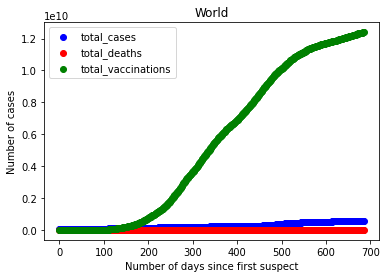

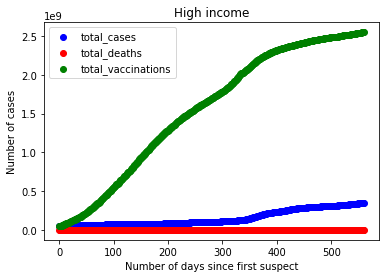

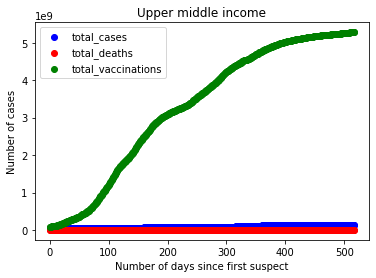

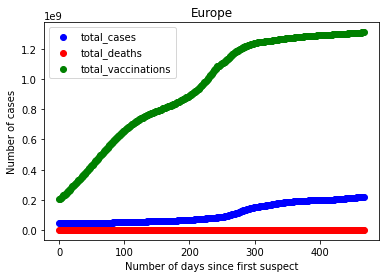

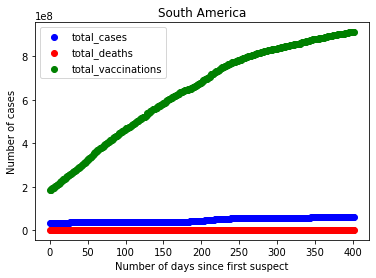

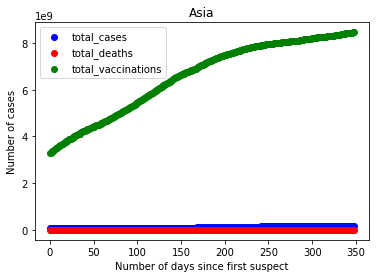

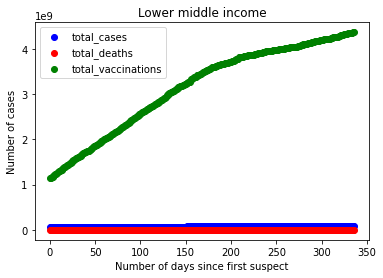

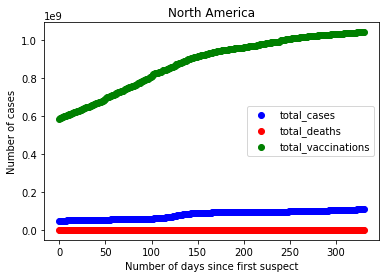

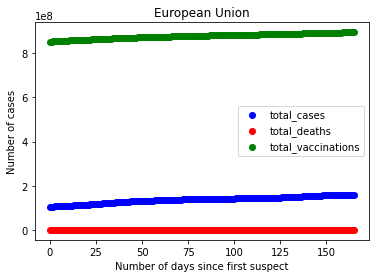

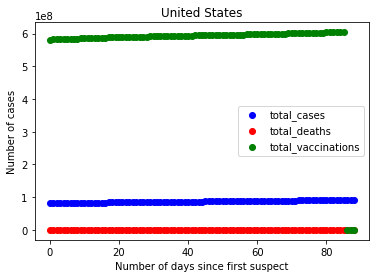

In [99]:
# We will show the trend of total_cases, total_deaths, total_vaccinations of these 10 countries using a scatter plot. We will use a for loop to get all those 8 countries' graphs.
for idx in range(0,len(countries)):
  C = df4[df4['Country']== countries[idx]].reset_index()
  plt.scatter(np.arange(0,len(C)),C['total_cases'],color="blue",label="total_cases")
  plt.scatter(np.arange(0,len(C)),C['total_deaths'],color="red",label="total_deaths")
  plt.scatter(np.arange(0,len(C)),C['total_vaccinations'],color="green",label="total_vaccinations")
  plt.title(countries[idx])
  plt.xlabel("Number of days since first suspect")
  plt.ylabel("Number of cases")
  plt.legend()
  plt.show()